In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('co2_emissions_kt_by_country.csv')
df

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


<AxesSubplot:>

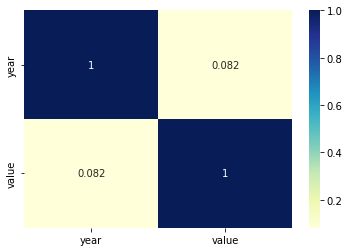

In [51]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [26]:
df.shape

(13953, 4)

In [64]:
df.describe()

,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


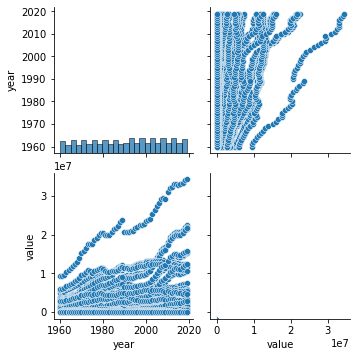

In [65]:
sns.pairplot(df)

In [28]:
df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [30]:
df.groupby('country_name')['value'].sum().reset_index().set_index('country_name').sort_values('value',ascending= False).head(10)

,value
country_name,
World,1.317557e+09
High income,6.672858e+08
IDA & IBRD total,6.667335e+08
OECD members,6.537873e+08
IBRD only,6.398760e+08
Low & middle income,6.390232e+08
Post-demographic dividend,6.369414e+08
Middle income,6.296777e+08
Upper middle income,4.823171e+08


In [31]:
df.groupby('country_name')['value'].max().sort_values(ascending=False).head(20)

country_name
World                                            3.434401e+07
IDA & IBRD total                                 2.244242e+07
Low & middle income                              2.190943e+07
Middle income                                    2.171260e+07
IBRD only                                        2.152242e+07
Upper middle income                              1.591866e+07
Late-demographic dividend                        1.549953e+07
East Asia & Pacific                              1.527588e+07
High income                                      1.363962e+07
OECD members                                     1.328727e+07
Post-demographic dividend                        1.254088e+07
East Asia & Pacific (excluding high income)      1.249182e+07
East Asia & Pacific (IDA & IBRD countries)       1.243564e+07
Europe & Central Asia                            1.092232e+07
China                                            1.070722e+07
Early-demographic dividend                       7.452717

In [32]:
income = df[df['country_name'].str.contains('income')]['country_name'].unique()
ida = df[df['country_name'].str.contains('IDA')]['country_name'].unique()
ibrd = df[df['country_name'].str.contains('IBRD')]['country_name'].unique()


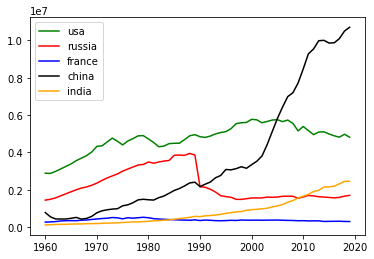

In [23]:
usa = df[df['country_name']=='United States']
russia = df[df['country_name']=='Russian Federation']
france = df[df['country_name']=='France']
china = df[df['country_name']=='China']
india = df[df['country_name']== 'India']
plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia')
plt.plot(france.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'france')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india')
plt.legend(loc = 'best')

<AxesSubplot:xlabel='country_name', ylabel='value'>

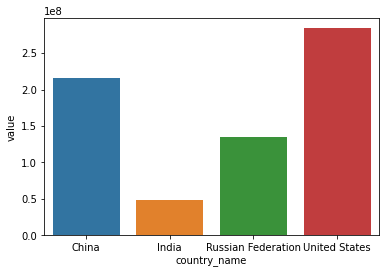

In [34]:
data = df.groupby('country_name')['value'].sum().reset_index()
sns.barplot(data= data[data['country_name'].isin(['United States',
                                                  'China', 'Russian Federation','India'])],x= 'country_name',y='value')

In [38]:
import plotly.express as px
fig = px.choropleth(df, locations='country_code',
                    animation_frame='year', animation_group='country_name',
                    color='value', 
                    hover_name='country_name',
                    hover_data=['year', 'country_name', 'value'],
                    color_continuous_scale=px.colors.sequential.dense)
fig.show()

In [41]:
px.area(df, x='year', y='value', line_group='country_name', color='country_name',
                   category_orders={
                    "country_name": df 
            },
                labels={
                     "value": "CO2 Emissions",
                     "year": "Year",
                     "country_name": "Country"
                 },
              title = 'Annual CO2 Emissions, by Country',
       template="simple_white")

In [43]:
data = df.groupby('year')['value'].sum()
co2_yoy = data.reset_index().set_index('year')


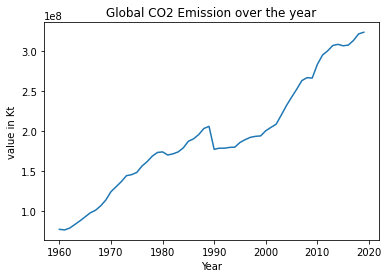

In [44]:
plt.title('Global CO2 Emission over the year')
plt.xlabel('Year')
plt.ylabel('value in Kt')
plt.plot(co2_yoy)

In [72]:
import panel as pn
pn.extension('tabulator')

In [74]:
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

ModuleNotFoundError: No module named 'jupyter_bokeh'

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

In [75]:
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
            #  pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

NameError: name 'yaxis_co2' is not defined